In [1]:
import pandas as pd
import numpy as np

In [2]:
movies=pd.read_csv("/content/movies_inno.csv")

In [4]:
movies.shape

(9742, 3)

In [5]:
ratings=pd.read_csv("/content/ratings_inno.csv")

In [6]:
ratings.shape

(100836, 4)

In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
x=ratings.userId.unique()

In [11]:
len(x)

610

In [12]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
links=pd.read_csv("/content/links_inno.csv")

In [14]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [15]:
tags=pd.read_csv("/content/tags_inno.csv")

In [16]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [19]:
movierating = pd.merge(movies, ratings, on=["movieId", "movieId"])
print(movierating.head())

   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating   timestamp  
0       1     4.0   964982703  
1       5     4.0   847434962  
2       7     4.5  1106635946  
3      15     2.5  1510577970  
4      17     4.5  1305696483  


In [20]:
ratings1 = movierating["rating"].value_counts()
numbers = ratings1.index
quantity = ratings1.values
import plotly.express as px
fig = px.pie(movierating, values=quantity, names=numbers)
fig.show()

In [28]:
ratings2 = movierating["title"].value_counts()
ratings2

Forrest Gump (1994)                      329
Shawshank Redemption, The (1994)         317
Pulp Fiction (1994)                      307
Silence of the Lambs, The (1991)         279
Matrix, The (1999)                       278
                                        ... 
We're Back! A Dinosaur's Story (1993)      1
American Hardcore (2006)                   1
Shanghai Surprise (1986)                   1
Let's Get Harry (1986)                     1
Andrew Dice Clay: Dice Rules (1991)        1
Name: title, Length: 9719, dtype: int64

In [29]:
movietags = pd.merge(movies, tags, on=["movieId", "movieId"])
print(movietags.head())

   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        2    Jumanji (1995)                   Adventure|Children|Fantasy   
4        2    Jumanji (1995)                   Adventure|Children|Fantasy   

   userId               tag   timestamp  
0     336             pixar  1139045764  
1     474             pixar  1137206825  
2     567               fun  1525286013  
3      62           fantasy  1528843929  
4      62  magic board game  1528843932  


In [31]:
movietags2=movietags[["title","tag"]]
movietags2

,title,tag
0,Toy Story (1995),pixar
1,Toy Story (1995),pixar
2,Toy Story (1995),fun
3,Jumanji (1995),fantasy
4,Jumanji (1995),magic board game
...,...,...
3678,Solo: A Star Wars Story (2018),star wars
3679,Gintama: The Movie (2010),anime
3680,Gintama: The Movie (2010),comedy
3681,Gintama: The Movie (2010),gintama


In [32]:
movietags2.describe()

,title,tag
count,3683,3683
unique,1572,1589
top,Pulp Fiction (1994),In Netflix queue
freq,181,131


In [35]:
movietitle="Matrix, The (1999)"

In [41]:
selected_rows1 = movietags[movietags['title'] == movietitle]

print(selected_rows1)

      movieId               title                  genres  userId  \
1313     2571  Matrix, The (1999)  Action|Sci-Fi|Thriller     424   
1314     2571  Matrix, The (1999)  Action|Sci-Fi|Thriller     424   
1315     2571  Matrix, The (1999)  Action|Sci-Fi|Thriller     474   
1316     2571  Matrix, The (1999)  Action|Sci-Fi|Thriller     537   
1317     2571  Matrix, The (1999)  Action|Sci-Fi|Thriller     537   

                     tag   timestamp  
1313        martial arts  1457842912  
1314              sci-fi  1457842899  
1315  alternate universe  1137204991  
1316          philosophy  1424141098  
1317    post apocalyptic  1424141101  


In [42]:
selected_rows1["title"].value_counts()

Matrix, The (1999)    5
Name: title, dtype: int64

In [43]:
movietitle2="Terminator 2: Judgment Day (1991)"

In [46]:
selected_rows2 = movierating[movierating['title'] == movietitle2]

print(selected_rows2)

       movieId                              title         genres  userId  \
15651      589  Terminator 2: Judgment Day (1991)  Action|Sci-Fi       5   
15652      589  Terminator 2: Judgment Day (1991)  Action|Sci-Fi       6   
15653      589  Terminator 2: Judgment Day (1991)  Action|Sci-Fi       7   
15654      589  Terminator 2: Judgment Day (1991)  Action|Sci-Fi      11   
15655      589  Terminator 2: Judgment Day (1991)  Action|Sci-Fi      15   
...        ...                                ...            ...     ...   
15870      589  Terminator 2: Judgment Day (1991)  Action|Sci-Fi     606   
15871      589  Terminator 2: Judgment Day (1991)  Action|Sci-Fi     607   
15872      589  Terminator 2: Judgment Day (1991)  Action|Sci-Fi     608   
15873      589  Terminator 2: Judgment Day (1991)  Action|Sci-Fi     609   
15874      589  Terminator 2: Judgment Day (1991)  Action|Sci-Fi     610   

       rating   timestamp  
15651     3.0   847435258  
15652     3.0   845553317  
156

In [47]:
selected_rows2["title"].value_counts()

Terminator 2: Judgment Day (1991)    224
Name: title, dtype: int64

In [50]:
average_value = selected_rows2["rating"].mean()
average_value

3.970982142857143

In [51]:
movietitle3="Fight Club (1999)"

In [52]:
selected_rows3 = movierating[movierating['title'] == movietitle3]

print(selected_rows3)

       movieId              title                       genres  userId  \
49835     2959  Fight Club (1999)  Action|Crime|Drama|Thriller       1   
49836     2959  Fight Club (1999)  Action|Crime|Drama|Thriller       4   
49837     2959  Fight Club (1999)  Action|Crime|Drama|Thriller      10   
49838     2959  Fight Club (1999)  Action|Crime|Drama|Thriller      15   
49839     2959  Fight Club (1999)  Action|Crime|Drama|Thriller      16   
...        ...                ...                          ...     ...   
50048     2959  Fight Club (1999)  Action|Crime|Drama|Thriller     601   
50049     2959  Fight Club (1999)  Action|Crime|Drama|Thriller     603   
50050     2959  Fight Club (1999)  Action|Crime|Drama|Thriller     606   
50051     2959  Fight Club (1999)  Action|Crime|Drama|Thriller     608   
50052     2959  Fight Club (1999)  Action|Crime|Drama|Thriller     610   

       rating   timestamp  
49835     5.0   964983282  
49836     2.0   945078528  
49837     0.5  1455356582  

Rating Counts:
5.0    81
4.5    49
4.0    49
3.5    17
3.0    10
2.0     5
0.5     3
2.5     3
1.5     1
Name: rating, dtype: int64


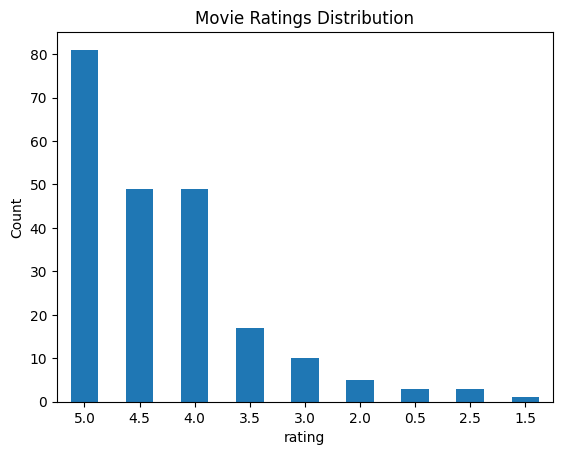

In [57]:
import matplotlib.pyplot as plt
ratings_counts = selected_rows3['rating'].value_counts()
print("Rating Counts:")
print(ratings_counts)
ratings_counts.plot(kind='bar', rot=0)
plt.xlabel('rating')
plt.ylabel('Count')
plt.title('Movie Ratings Distribution')
plt.show()

In [71]:
movierating = pd.merge(movies, ratings, on=["movieId", "movieId"])
print(movierating.head())

   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating   timestamp  
0       1     4.0   964982703  
1       5     4.0   847434962  
2       7     4.5  1106635946  
3      15     2.5  1510577970  
4      17     4.5  1305696483  


In [74]:
ratings_summary = movierating.groupby('movieId')['rating'].agg(['count', 'mean'])

print(ratings_summary)

         count      mean
movieId                 
1          215  3.920930
2          110  3.431818
3           52  3.259615
4            7  2.357143
5           49  3.071429
...        ...       ...
193581       1  4.000000
193583       1  3.500000
193585       1  3.500000
193587       1  3.500000
193609       1  4.000000

[9724 rows x 2 columns]


In [75]:
merged_df = pd.merge(movies, ratings_summary, on='movieId', how='inner')
print(merged_df)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9719   193581  Black Butler: Book of the Atlantic (2017)   
9720   193583               No Game No Life: Zero (2017)   
9721   193585                               Flint (2017)   
9722   193587        Bungo Stray Dogs: Dead Apple (2018)   
9723   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  count      mean  
0     Adventure|Animation|Children|Comedy|Fantasy    215  3.920930  
1                      Adventure|Children|Fantasy    110  3.431818  
2                                  Comedy|Romance     52  3.259615  
3  

In [76]:
filtered_df = merged_df[merged_df['count'] > 50]
filtered_df

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [77]:
most_popular_movie = filtered_df.loc[filtered_df['mean'].idxmax()]
print("Most Popular Movie:")
print(most_popular_movie[['movieId', 'title', 'mean']])

Most Popular Movie:
movieId                                 318
title      Shawshank Redemption, The (1994)
mean                               4.429022
Name: 277, dtype: object


In [78]:
top5_popular_movies = filtered_df.sort_values(by='count', ascending=False).head(5)
print("Top 5 Popular Movies Based on Number of User Ratings:")
print(top5_popular_movies[['movieId', 'title', 'count']])


Top 5 Popular Movies Based on Number of User Ratings:
      movieId                             title  count
314       356               Forrest Gump (1994)    329
277       318  Shawshank Redemption, The (1994)    317
257       296               Pulp Fiction (1994)    307
510       593  Silence of the Lambs, The (1991)    279
1938     2571                Matrix, The (1999)    278


In [79]:
sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi', case=False, na=False)]
third_most_popular_sci_fi_movie = sci_fi_movies.sort_values(by='count', ascending=False).iloc[2]

print("Third Most Popular Sci-Fi Movie Based on Number of User Ratings:")
print(third_most_popular_sci_fi_movie[['movieId', 'title', 'count']])


Third Most Popular Sci-Fi Movie Based on Number of User Ratings:
movieId                     480
title      Jurassic Park (1993)
count                       238
Name: 418, dtype: object


In [139]:
linkrating2 = pd.merge(links,filtered_df, on=["movieId", "movieId"])
print(linkrating2.head())

   movieId  imdbId   tmdbId                    title  \
0        1  114709    862.0         Toy Story (1995)   
1        2  113497   8844.0           Jumanji (1995)   
2        3  113228  15602.0  Grumpier Old Men (1995)   
3        6  113277    949.0              Heat (1995)   
4        7  114319  11860.0           Sabrina (1995)   

                                        genres  count      mean  
0  Adventure|Animation|Children|Comedy|Fantasy    215  3.920930  
1                   Adventure|Children|Fantasy    110  3.431818  
2                               Comedy|Romance     52  3.259615  
3                        Action|Crime|Thriller    102  3.946078  
4                               Comedy|Romance     54  3.185185  


In [159]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8',
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'itemprop' : 'ratingValue'})
    return imdb_rating.text if imdb_rating else np.nan
print(scrapper)

<function scrapper at 0x7f4fc991aef0>


In [174]:
def scrapper(imdb_id):
  response = requests.get(f"https://www.imdb.com/title/{imdb_id}/")
  if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")
    movie_id = soup.find("div", class_="titleBar").find("h1").text
    rating = soup.find("div", class_="ratingValue").find("span").text
    return movie_id, rating
  else:
    return None, None

In [175]:
highest_rating = 0.0
best_movie_id = None
for index, row in linkrating2.iterrows():
    imdb_id = row['imdbId']
    movie_id, rating = scrapper(imdb_id)
    if not pd.isna(rating) and float(rating) > highest_rating:
        highest_rating = float(rating)
        best_movie_id = row['movieId']
print(f"The movie with the highest IMDb rating is movieId: {best_movie_id} with a rating of {highest_rating}")

The movie with the highest IMDb rating is movieId: None with a rating of 0.0


In [122]:
highest_rating = 0.0
best_sci_fi_movie_id = None
for index, row in linkrating2.iterrows():
    genres = row['genres']
    imdb_id = row['imdbId']
    if 'Sci-Fi' in genres:
        movie_id, rating = scrapper(imdb_id)
        if not pd.isna(rating) and float(rating) > highest_rating:
            highest_rating = float(rating)
            best_sci_fi_movie_id = movie_id
print(f"The Sci-Fi movie with the highest IMDb rating is movieId: {best_sci_fi_movie_id} with a rating of {highest_rating}")

The Sci-Fi movie with the highest IMDb rating is movieId: None with a rating of 0.0
